In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

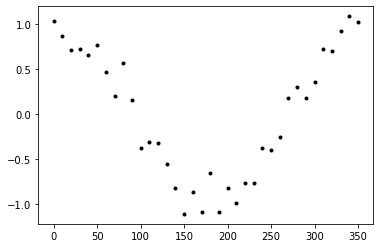

In [2]:
x = np.arange(0,360,10)
y = np.cos(x * np.pi/180) + np.random.normal(0,0.15,len(x))
df = pd.DataFrame({'x': x, 'y': y})
plt.plot(df['x'], df['y'], 'k.')

In [3]:
from sklearn.preprocessing import PolynomialFeatures
a = [2]
apoli = PolynomialFeatures(5, include_bias=False)
apoli.fit_transform([a])

array([[ 2.,  4.,  8., 16., 32.]])

In [4]:
b = [3,6,9]
bpoli= PolynomialFeatures(10, include_bias=False)
bp = bpoli.fit_transform(np.array(b).reshape(-1,1))
bp.astype(int)

array([[          3,           9,          27,          81,         243,
                729,        2187,        6561,       19683,       59049],
       [          6,          36,         216,        1296,        7776,
              46656,      279936,     1679616,    10077696,    60466176],
       [          9,          81,         729,        6561,       59049,
             531441,     4782969,    43046721,   387420489, -2147483648]])

In [5]:
df = pd.DataFrame({'c': np.arange(1,11)})
df

,c
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [6]:
for i in range(2,11):
    df[f'c{i}']=df['c']**i
df

,c,c2,c3,c4,c5,c6,c7,c8,c9,c10
0,1,1,1,1,1,1,1,1,1,1
1,2,4,8,16,32,64,128,256,512,1024
2,3,9,27,81,243,729,2187,6561,19683,59049
3,4,16,64,256,1024,4096,16384,65536,262144,1048576
4,5,25,125,625,3125,15625,78125,390625,1953125,9765625
5,6,36,216,1296,7776,46656,279936,1679616,10077696,60466176
6,7,49,343,2401,16807,117649,823543,5764801,40353607,282475249
7,8,64,512,4096,32768,262144,2097152,16777216,134217728,1073741824
8,9,81,729,6561,59049,531441,4782969,43046721,387420489,-808182895
9,10,100,1000,10000,100000,1000000,10000000,100000000,1000000000,1410065408


In [7]:
x = PolynomialFeatures(10, include_bias = False)
cp = x.fit_transform(df[['c']])
dfcp = pd.DataFrame(cp)
dfcp

,0,1,2,3,4,5,6,7,8,9
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000e+00,1.000000e+00
1,2.0,4.0,8.0,16.0,32.0,64.0,128.0,256.0,5.120000e+02,1.024000e+03
2,3.0,9.0,27.0,81.0,243.0,729.0,2187.0,6561.0,1.968300e+04,5.904900e+04
3,4.0,16.0,64.0,256.0,1024.0,4096.0,16384.0,65536.0,2.621440e+05,1.048576e+06
4,5.0,25.0,125.0,625.0,3125.0,15625.0,78125.0,390625.0,1.953125e+06,9.765625e+06
5,6.0,36.0,216.0,1296.0,7776.0,46656.0,279936.0,1679616.0,1.007770e+07,6.046618e+07
6,7.0,49.0,343.0,2401.0,16807.0,117649.0,823543.0,5764801.0,4.035361e+07,2.824752e+08
7,8.0,64.0,512.0,4096.0,32768.0,262144.0,2097152.0,16777216.0,1.342177e+08,1.073742e+09
8,9.0,81.0,729.0,6561.0,59049.0,531441.0,4782969.0,43046721.0,3.874205e+08,3.486784e+09
9,10.0,100.0,1000.0,10000.0,100000.0,1000000.0,10000000.0,100000000.0,1.000000e+09,1.000000e+10


### Pipeline

In [8]:
#data => standardscaler() => binarizer()
# from sklearn.preprocessing import StandardScaler, Binarizer
# data = np.arange(1000,11000,1000)
# data1 = StandardScaler().fit_transform(data.reshape(1,-1))
# data2 = Binarizer().fit_transform(data.reshape(1,-1))

In [11]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, Binarizer
data = np.arange(1000,11000,1000)
pipe = make_pipeline(StandardScaler(),Binarizer(threshold=-0.525))

pipe.fit_transform(data.reshape(-1,1))

array([[0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

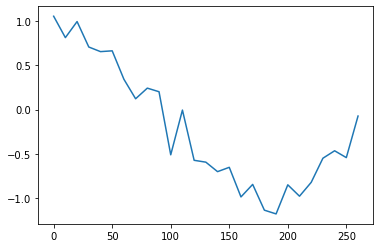

In [12]:
x = np.arange(0,270,10)
y = np.cos(x*np.pi/180) + np.random.normal(0,0.15,len(x))
df = pd.DataFrame({'x': x,'y': y})
plt.plot(x,y)

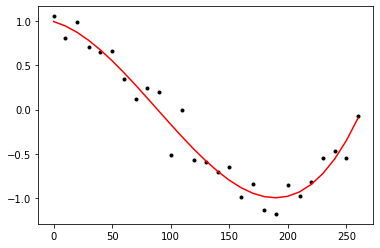

In [13]:
#pipeline => polynomial => linear regression
from sklearn.linear_model import LinearRegression
polyReg = make_pipeline(PolynomialFeatures(3,include_bias=False), LinearRegression())

#train
polyReg.fit(df[['x']], df['y'])

#predict
df['y 3'] = polyReg.predict(df[['x']])

#ploting
plt.plot(df['x'], df['y'],'k.')
plt.plot(df['x'], df['y 3'], 'r-')

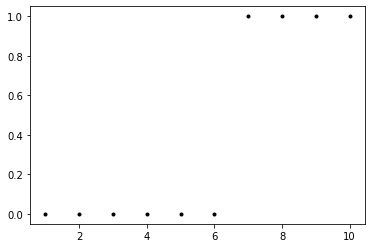

In [15]:
data = {'x': np.arange(1,11),
        'y': [0,0,0,0,0,0,1,1,1,1]}
df = pd.DataFrame(data)
plt.plot(df['x'], df['y'], 'k.')